In [1]:
from glob import glob
import re
import matplotlib.pyplot as plt
from PIL import Image
import os
import pandas as pd
import numpy as np

In [2]:
subdirs = glob('malimg_paper_dataset_imgs/*')
sub_list = []
for dir in subdirs:
    sub_list.append(re.findall(r'malimg_paper_dataset_imgs/(.*)', dir)[0])

In [5]:
malware_dict = {}

for dir in sub_list:
    malware_dict[dir] = len(glob(f'malimg_paper_dataset_imgs/{dir}/*'))

In [6]:
malware_dict = dict(sorted(malware_dict.items(), key=lambda x: (-x[1], x[0])))

In [7]:
total = np.sum(list(malware_dict.values()))

# PCC

In [13]:
pcc = np.sum((np.array(list(malware_dict.values())) / total) ** 2)
print(f'PCC * 1.25: {pcc*1.25*100:.2f}%')

PCC * 1.25: 18.34%


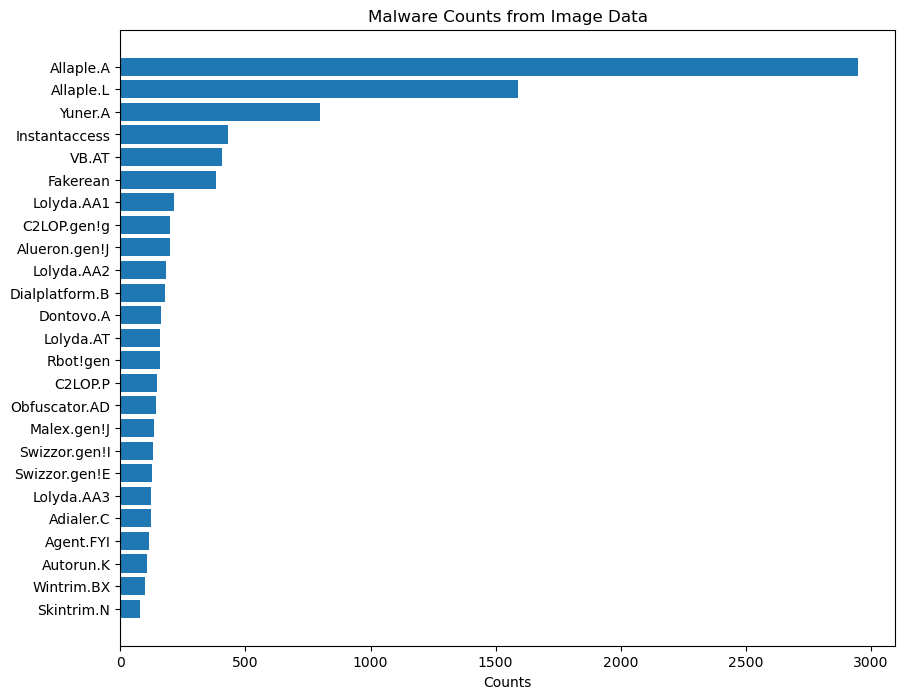

In [20]:
# Creating a bar plot
plt.figure(figsize=(10, 8))
plt.barh(list(malware_dict.keys()), list(malware_dict.values()))
plt.xlabel('Counts')
plt.title('Malware Counts from Image Data')
plt.gca().invert_yaxis()  # Invert the y-axis to show the highest counts at the top
plt.savefig('malimg_distribution.png')
plt.show()

# Image Dimension Distribution

In [16]:
Image.MAX_IMAGE_PIXELS = None

files = glob('malimg_paper_dataset_imgs/*/*')

images = {}
for i, file in enumerate(files):
    images[i] = {}
    img = Image.open(file)
    width, height = img.size
    images[i]['file'] = file
    images[i]['width'] = width
    images[i]['height'] = height

In [17]:
df = pd.DataFrame(images).T

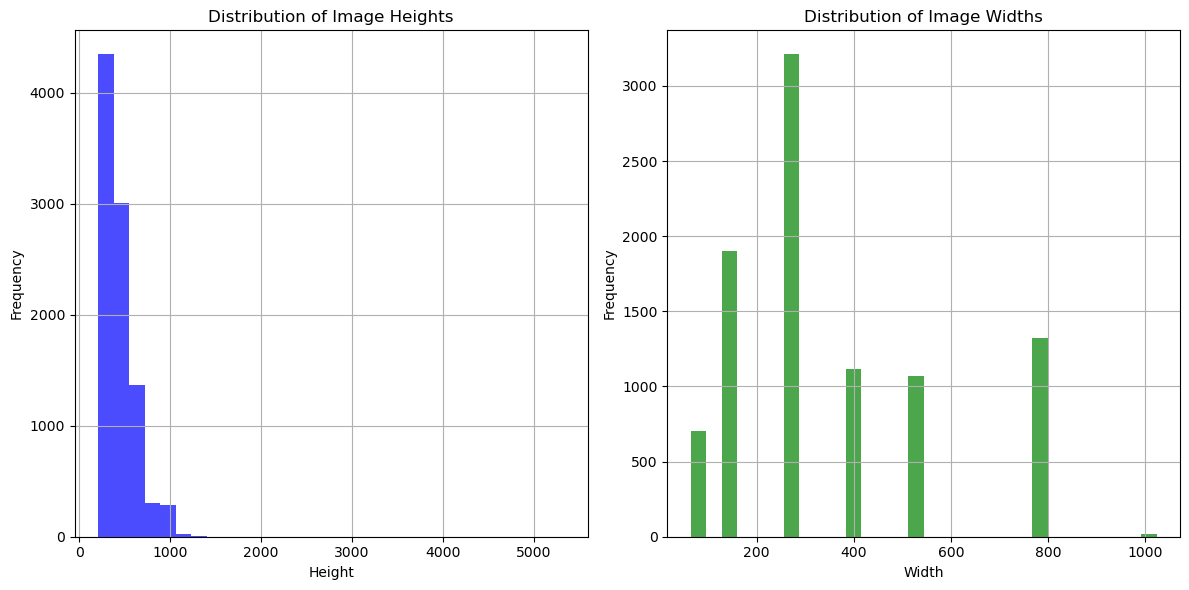

In [19]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
df['height'].hist(bins=30, color='blue', alpha=0.7, ax=plt.gca())
plt.title('Distribution of Image Heights')
plt.xlabel('Height')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
df['width'].hist(bins=30, color='green', alpha=0.7, ax=plt.gca())
plt.title('Distribution of Image Widths')
plt.xlabel('Width')
plt.ylabel('Frequency')

plt.tight_layout()
plt.savefig('image_dim.png')
plt.show()